In [15]:
import numpy as np
import cv2
import glob

# Load and preprocess the medical images

In [16]:
images = []
paths =[]
for filename in glob.glob('/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/*.jpg'):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    paths.append(filename)
images = np.array(images)

# Extract features from the medical images using a pre-trained CNN model

In [17]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [18]:

model = VGG16(include_top=False, weights='imagenet')
images = preprocess_input(images)
features = model.predict(images)
features = features.reshape(features.shape[0], -1)

In [19]:
type(features)

numpy.ndarray

In [20]:
np.save('extract.npy', features)

In [21]:
data = np.load('extract.npy')
# print the array
print(data)

[[0.        0.        0.        ... 0.        1.7068813 0.       ]
 [0.        0.        0.        ... 0.        1.8209922 0.       ]
 [0.        0.        0.        ... 0.        1.798986  0.       ]
 ...
 [0.        0.        0.        ... 0.        1.7386997 0.       ]
 [0.        0.        0.        ... 0.        0.7559158 0.       ]
 [0.        0.        0.        ... 0.        2.2767136 0.       ]]


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
distances = cosine_similarity(data)

In [23]:
import urllib.request
from PIL import Image

In [24]:
urllib.request.urlretrieve('https://upcdn.io/W142hJk/image/demo/4mev5RGFcu.png.crop?w=600&h=600&fit=max&q=70',
    "/Users/aishaandatt/Downloads/CBIR/query_imgs/image.png")
im1 = Image.open("/Users/aishaandatt/Downloads/CBIR/query_imgs/image.png")
im2 = im1.save('/Users/aishaandatt/Downloads/CBIR/query_imgs/image2.png')
query = '/Users/aishaandatt/Downloads/CBIR/query_imgs/image2.png'
index = '/Users/aishaandatt/Downloads/CBIR/idx1.h5py'
result = '/Users/aishaandatt/Downloads/CBIR/Dataset'

In [25]:

url = 'https://images.heb.com/is/image/HEBGrocery/000321109?fit=constrain,1&wid=800&hei=800&fmt=jpg&qlt=85,0&resMode=sharp2&op_usm=1.75,0.3,2,0'
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

In [26]:
# query_img = cv2.imread(img)
query_img = cv2.resize(img, (224, 224))
query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
query_img = np.array([query_img])
query_img = preprocess_input(query_img)
query_features = model.predict(query_img)
query_features = query_features.reshape(query_features.shape[0], -1)
query_distances = cosine_similarity(query_features, features)

In [27]:
sorted_indices = np.argsort(query_distances.flatten())[::-1]

In [28]:
for i in range(9):
    print(paths[sorted_indices[i]])
    print(query_distances[0, sorted_indices[i]])

/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_44.jpg
0.14638938
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_37.jpg
0.14368434
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_42.jpg
0.14322859
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_41.jpg
0.14191432
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_23.jpg
0.14108054
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_38.jpg
0.14088945
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_39.jpg
0.13938935
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_21.jpg
0.13889913
/Users/aishaandatt/Downloads/CBIR/Brain_DS/Moderate_Demented/moderate_36.jpg
0.13815646


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


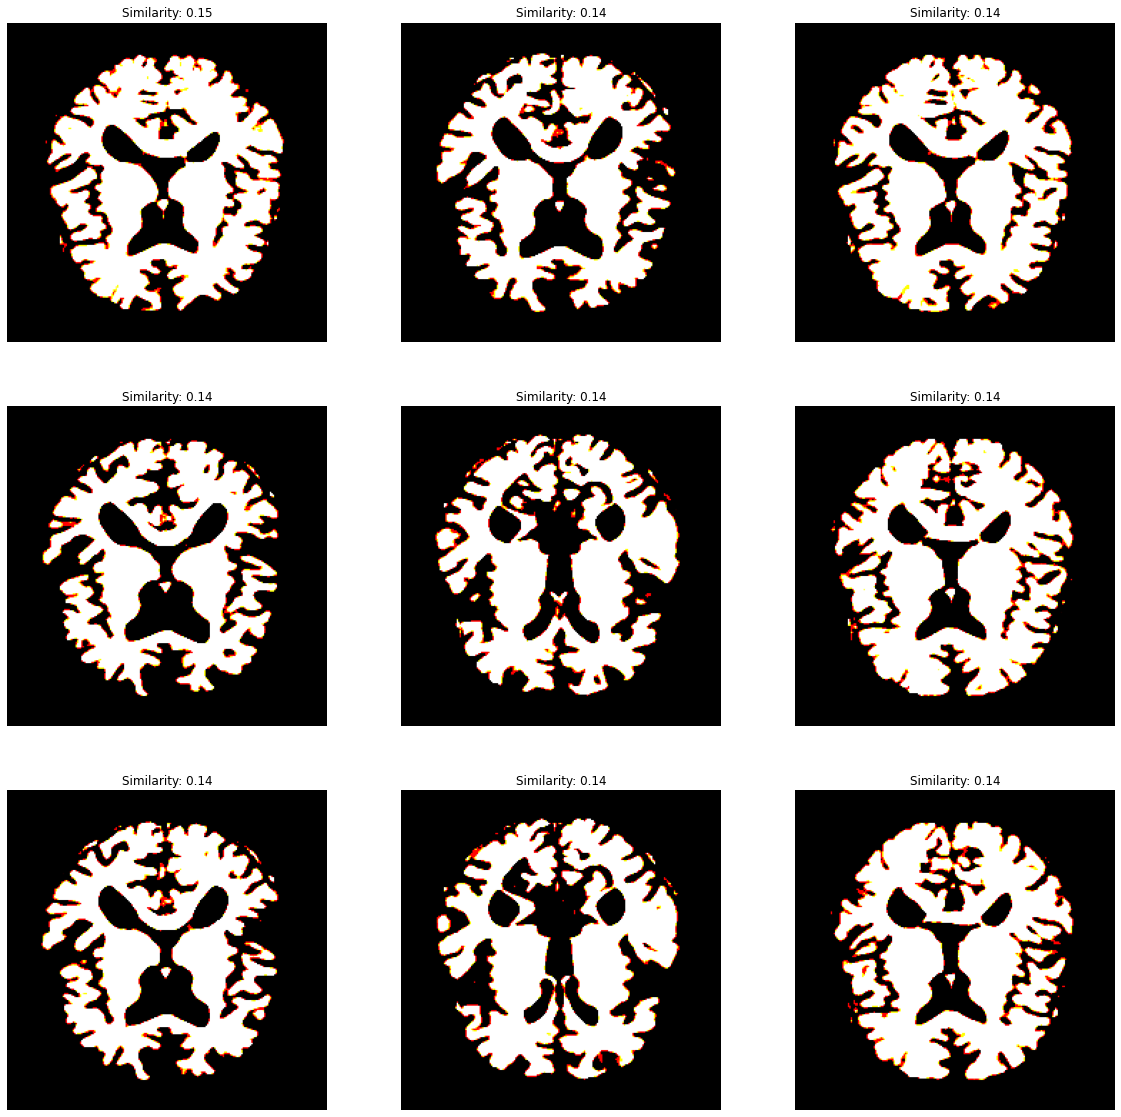

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(images[sorted_indices[i]])
    ax.axis('off')
    ax.set_title('Similarity: {:.2f}'.format(query_distances[0, sorted_indices[i]]))
plt.show()